In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
path = 'data/traffic_sp/'

files = os.listdir(path)

2023-04-16 14:06:34.813226: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 14:06:34.957840: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-16 14:06:34.957858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-16 14:06:34.993434: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-04-16 14:06:35.823692: W tensorflow/stream_executor/platform/de

### Define helper funcs to clean and concat data

In [2]:
def delete_columns(df, column_list):
    df.drop(column_list, axis=1, inplace=True)
    return df

In [3]:
def concat_dfs(df_list):
    df = pd.concat(df_list, axis=0)
    return df

In [4]:
def rename_columns(df, column_list):
    df.columns = column_list
    return df

### cleaning from 2010-2011

In [5]:
df2010 = pd.read_csv(path + 'lentidaotrechos2010.csv', sep=';', encoding='ISO-8859-1')
df2011 = pd.read_csv(path + 'lentidaotrechos2011.csv', sep=';', encoding='ISO-8859-1')
df_list = [df2010, df2011]

In [6]:
df_2010_2011 = concat_dfs(df_list)
df_2010_2011.head()

,Data,Corredor,Sentido,Pista,Trecho,Valor,Região
0,2/1/10 18:00,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até COROA,1090,LESTE
1,2/1/10 18:00,Vale/P.Maia/Tirad/S.Dumont,Santana/Aeroporto,NaN,De BANDEIRAS Término da Pte até BANDEIRAS Tér...,410,CENTRO
2,2/1/10 18:30,"Vitor Manzini, Av",Centro/Bairro,NaN,De SOCORRO Inicio Pte até WASHINGTON LUIS,550,SUL
3,2/1/10 18:30,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até CRUZEIRO DO SUL,500,LESTE
4,2/1/10 19:00,Marginal Tietê,Castelo/A.Senna,A,De CASA VERDE até LIMAO,1290,LESTE


In [7]:
df_2010_2011 = rename_columns(df_2010_2011, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2010_2011.head()


,data,corredor,sentido,pista,trecho,valor,regiao
0,2/1/10 18:00,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até COROA,1090,LESTE
1,2/1/10 18:00,Vale/P.Maia/Tirad/S.Dumont,Santana/Aeroporto,NaN,De BANDEIRAS Término da Pte até BANDEIRAS Tér...,410,CENTRO
2,2/1/10 18:30,"Vitor Manzini, Av",Centro/Bairro,NaN,De SOCORRO Inicio Pte até WASHINGTON LUIS,550,SUL
3,2/1/10 18:30,Marginal Tietê,A.Senna/Castelo Branco,A,De BANDEIRAS até CRUZEIRO DO SUL,500,LESTE
4,2/1/10 19:00,Marginal Tietê,Castelo/A.Senna,A,De CASA VERDE até LIMAO,1290,LESTE


In [8]:
df_2010_2011 = delete_columns(df_2010_2011, ['corredor', 'sentido', 'pista', 'trecho'])
df_2010_2011.head()

,data,valor,regiao
0,2/1/10 18:00,1090,LESTE
1,2/1/10 18:00,410,CENTRO
2,2/1/10 18:30,550,SUL
3,2/1/10 18:30,500,LESTE
4,2/1/10 19:00,1290,LESTE


### Cleaning from 2012 - 2013

In [9]:
df2012 = pd.read_csv(path + 'lentidaotrechos2012.csv', sep=';', encoding='ISO-8859-1')
df2013 = pd.read_csv(path + 'lentidaotrechos2013.csv', sep=';', encoding='ISO-8859-1')
df_list2 = [df2012, df2013]

In [10]:
df_2012_2013 = concat_dfs(df_list2)
df_2012_2013.head()

,data,corredor,sentido,expressa,descricao,tamanho,nome_regiao
0,01/01/2012 21:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
1,01/01/2012 21:30,"Pedro Alvares Cabral, Av",Vila Mariana/Pinheiros,NaN,De ARMANDO DE SALES OLIVEIRA até ABILIO SOARES,460,SUL
2,01/01/2012 22:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
3,01/01/2012 22:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
4,01/01/2012 23:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO


In [11]:
df_2012_2013 = rename_columns(df_2012_2013, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2012_2013.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,01/01/2012 21:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
1,01/01/2012 21:30,"Pedro Alvares Cabral, Av",Vila Mariana/Pinheiros,NaN,De ARMANDO DE SALES OLIVEIRA até ABILIO SOARES,460,SUL
2,01/01/2012 22:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
3,01/01/2012 22:30,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO
4,01/01/2012 23:00,"Paulista, Av",Paraiso/Consolação,NaN,De OTAVIO MENDES até TEIXEIRA DA SILVA,1300,CENTRO


In [12]:
df_2012_2013 = delete_columns(df_2012_2013, ['corredor', 'sentido', 'pista', 'trecho'])
df_2012_2013.head()

,data,valor,regiao
0,01/01/2012 21:30,1300,CENTRO
1,01/01/2012 21:30,460,SUL
2,01/01/2012 22:00,1300,CENTRO
3,01/01/2012 22:30,1300,CENTRO
4,01/01/2012 23:00,1300,CENTRO


### Cleanining 2014 data

In [13]:
df_2014 = pd.read_csv(path + 'lentidaotrechos2014.csv', sep=';', encoding='ISO-8859-1')
df_2014.head()

,data/hora,corredor,sentido,expressa,Trecho,tamanho (metros),nome_regiao
0,02/01/2014 07:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De JABAQUARA Vd até ALIOMAR BALEEIRO Término,1100,SUL
1,02/01/2014 07:00,"Interlagos, Av I",Bairro/Centro,NaN,De JURUBATUBA Término até JOAO PAULO DA SILVA,910,SUL
2,02/01/2014 07:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
3,02/01/2014 08:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
4,02/01/2014 08:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL


In [14]:
df_2014 = rename_columns(df_2014, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2014.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,02/01/2014 07:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De JABAQUARA Vd até ALIOMAR BALEEIRO Término,1100,SUL
1,02/01/2014 07:00,"Interlagos, Av I",Bairro/Centro,NaN,De JURUBATUBA Término até JOAO PAULO DA SILVA,910,SUL
2,02/01/2014 07:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
3,02/01/2014 08:00,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL
4,02/01/2014 08:30,"Bandeirantes, Av dos",Imigrantes/Marginal,NaN,De MIRUNA até ALIOMAR BALEEIRO Término,2130,SUL


In [15]:
df_2014 = delete_columns(df_2014, ['corredor', 'sentido', 'pista', 'trecho'])

In [16]:
df_2014.head()

,data,valor,regiao
0,02/01/2014 07:00,1100,SUL
1,02/01/2014 07:00,910,SUL
2,02/01/2014 07:30,2130,SUL
3,02/01/2014 08:00,2130,SUL
4,02/01/2014 08:30,2130,SUL


### Cleaning 2015 - 2016

In [17]:
df_2015 = pd.read_csv(path + 'lentidaotrechos2015.csv', sep=';', encoding='ISO-8859-1')
df_2016 = pd.read_csv(path + 'lentidaotrechos2016.csv', sep=';', encoding='ISO-8859-1')
df_list3 = [df_2015, df_2016]

In [18]:
df_2015_2016 = concat_dfs(df_list3)
df_2015_2016.head()

,data/hora,corredor,sentido,expressa,Trechos,tamanho,nome_regiao
0,04/01/2015 14:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
1,04/01/2015 14:30,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
2,04/01/2015 15:00,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
3,04/01/2015 15:00,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
4,04/01/2015 15:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE


In [19]:
df_2015_2016 = rename_columns(df_2015_2016, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2015_2016.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,04/01/2015 14:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
1,04/01/2015 14:30,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
2,04/01/2015 15:00,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE
3,04/01/2015 15:00,"Juscelino Kubitschek, Av Pres",Ibirapuera/Pinheiros,NaN,De Emboque Túnel Jânio Quadros até 290 m depo...,260,SUL
4,04/01/2015 15:30,"Jânio Quadros, Túnel",unico//,NaN,De OSCAR AMERICANO até JUSCELINO KUBITSCHEK,799,OESTE


In [20]:
df_2015_2016 = delete_columns(df_2015_2016, ['corredor', 'sentido', 'pista', 'trecho'])
df_2015_2016.head()

,data,valor,regiao
0,04/01/2015 14:30,799,OESTE
1,04/01/2015 14:30,260,SUL
2,04/01/2015 15:00,799,OESTE
3,04/01/2015 15:00,260,SUL
4,04/01/2015 15:30,799,OESTE


### Clean 2017 data

In [21]:
df_2017 = pd.read_csv(path + 'lentidaotrechos2017.csv', sep=';', encoding='ISO-8859-1')

In [22]:
df_2107 = rename_columns(df_2017, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2107.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,02/01/2017 06:30,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO
1,02/01/2017 06:30,Cidade Jardim / Europa / Colômbia,Bairro/Centro,NaN,De CIDADE JARDIM Término até CIDADE JARDIM In...,300,OESTE
2,02/01/2017 07:00,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO
3,02/01/2017 07:00,Cidade Jardim / Europa / Colômbia,Bairro/Centro,NaN,De MARIO FERRAZ até CIDADE JARDIM Término,596,OESTE
4,02/01/2017 07:30,"Nove de Julho, Av",Centro/Bairro,NaN,De BARATA RIBEIRO até BANDEIRA,1370,CENTRO


In [23]:
df_2017 = delete_columns(df_2017, ['corredor', 'sentido', 'pista', 'trecho'])
df_2017.head()

,data,valor,regiao
0,02/01/2017 06:30,1370,CENTRO
1,02/01/2017 06:30,300,OESTE
2,02/01/2017 07:00,1370,CENTRO
3,02/01/2017 07:00,596,OESTE
4,02/01/2017 07:30,1370,CENTRO


### Cleaning from 2018 - 2022

In [24]:
df2018 = pd.read_csv(path + 'lentidaotrechos2018.csv', sep=';', encoding='ISO-8859-1')
df2019 = pd.read_csv(path + 'lentidaotrechos2019.csv', sep=';', encoding='ISO-8859-1')
df2020 = pd.read_csv(path + 'lentidaotrechos2020.csv', sep=';', encoding='ISO-8859-1')
df2021 = pd.read_csv(path + 'lentidaotrechos2021.csv', sep=';', encoding='ISO-8859-1')
df2022 = pd.read_csv(path + 'lentidaotrechos2022.csv', sep=';', encoding='ISO-8859-1')
df_list4 = [df2018, df2019, df2020, df2021, df2022]

In [25]:
df_2018_2022 = concat_dfs(df_list4)
df_2018_2022.head()

,data,corredor,sentido,expressa,descricao,tamanho,nome_regiao
0,1/1/18 18:30,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
1,1/1/18 19:00,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
2,2/1/18 11:00,Vinte Três/R Berta/M Guimarães,Santana/Aeroporto,NaN,De JACEGUAI até BANDEIRA,832,CENTRO
3,2/1/18 12:00,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE
4,2/1/18 12:30,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE


In [26]:
df_2018_2022 = rename_columns(df_2018_2022, ['data', 'corredor', 'sentido', 'pista', 'trecho', 'valor', 'regiao'])
df_2018_2022.head()

,data,corredor,sentido,pista,trecho,valor,regiao
0,1/1/18 18:30,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
1,1/1/18 19:00,Marginal Tietê,A.Senna/Castelo Branco,E,De CRUZEIRO DO SUL até COROA,780,LESTE
2,2/1/18 11:00,Vinte Três/R Berta/M Guimarães,Santana/Aeroporto,NaN,De JACEGUAI até BANDEIRA,832,CENTRO
3,2/1/18 12:00,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE
4,2/1/18 12:30,Marginal Tietê,A.Senna/Castelo Branco,E,De BANDEIRAS até 690 m depois de ARCO DA SABESP,2110,LESTE


In [27]:
df_2018_2022 = delete_columns(df_2018_2022, ['corredor', 'sentido', 'pista', 'trecho'])


In [28]:
df_2018_2022.head()

,data,valor,regiao
0,1/1/18 18:30,780,LESTE
1,1/1/18 19:00,780,LESTE
2,2/1/18 11:00,832,CENTRO
3,2/1/18 12:00,2110,LESTE
4,2/1/18 12:30,2110,LESTE


### Concat all dfs

In [29]:
df_list_all = [df_2010_2011, df_2012_2013, df_2014, df_2015_2016, df_2017, df_2018_2022]
df = concat_dfs(df_list_all)

In [30]:
df.head()

,data,valor,regiao
0,2/1/10 18:00,1090,LESTE
1,2/1/10 18:00,410,CENTRO
2,2/1/10 18:30,550,SUL
3,2/1/10 18:30,500,LESTE
4,2/1/10 19:00,1290,LESTE


In [31]:
# remove time from date column and sum all values for each day by region
df['data'] = pd.to_datetime(df['data']).dt.date
df = df.groupby(['data', 'regiao']).sum().reset_index()
df.head()

/tmp/ipykernel_3177/3349275632.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['data'] = pd.to_datetime(df['data']).dt.date


,data,regiao,valor
0,2010-01-02,CENTRO,369829
1,2010-01-02,LESTE,423644
2,2010-01-02,NORTE,87830
3,2010-01-02,OESTE,340640
4,2010-01-02,SUL,294580


In [32]:
#turn valor column into km
df['valor'] = df['valor']/1000
df.head()

,data,regiao,valor
0,2010-01-02,CENTRO,369.829
1,2010-01-02,LESTE,423.644
2,2010-01-02,NORTE,87.830
3,2010-01-02,OESTE,340.640
4,2010-01-02,SUL,294.580


### Splitting weather data from 2010 onward and joining with traffic data

In [33]:
df_weather = pd.read_csv('data/openweather_data.csv')
df_weather.head()


,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2001-12-31,05:22:45,18:56:22,21.84,22.09,1010,77,17.63,40,10000.0,0.0,0,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,802
1,2002-01-01,05:23:23,18:56:40,20.75,20.94,1010,79,16.98,40,10000.0,2.1,290,"{'id': 802, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,802
2,2002-01-02,05:24:02,18:56:56,21.54,21.34,1011,61,13.71,20,10000.0,0.0,0,"{'id': 801, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,801
3,2002-01-03,05:24:41,18:57:11,21.30,21.44,1013,75,16.69,75,9000.0,2.6,130,"{'id': 721, 'main': 'Haze', 'description': 'ha...",NaN,NaN,NaN,721
4,2002-01-04,05:25:21,18:57:24,20.59,20.69,1015,76,16.21,20,7000.0,5.1,150,"{'id': 721, 'main': 'Haze', 'description': 'ha...",NaN,NaN,NaN,721


In [34]:
# filter date to start in 2010
df_weather = df_weather[df_weather['dt'] >= '2010-01-01']
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
2923,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2924,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2925,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
2926,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
2927,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [35]:
df_weather.reset_index(drop=True, inplace=True)
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [36]:
#turn date column to datetime
df_weather['dt'] = pd.to_datetime(df_weather['dt'])
df_weather.head()

,dt,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [37]:
#rename dt column to date
df_weather = df_weather.rename(columns={'dt': 'data'})
df_weather.head()

,data,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-01,05:23:21,18:56:39,19.90,20.37,1015,93,18.73,100,10000.0,1.0,310,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-03,05:24:39,18:57:10,23.20,23.77,1018,84,20.35,75,10000.0,4.1,150,"{'id': 701, 'main': 'Mist', 'description': 'mi...",NaN,NaN,NaN,701
3,2010-01-04,05:25:19,18:57:23,22.33,22.81,1017,84,19.50,75,10000.0,1.0,40,"{'id': 803, 'main': 'Clouds', 'description': '...",NaN,NaN,NaN,803
4,2010-01-05,05:25:59,18:57:36,21.34,21.93,1015,92,19.99,100,2000.0,1.5,360,"{'id': 521, 'main': 'Rain', 'description': 'sh...",NaN,NaN,NaN,521


In [38]:
#check date column datatype to see if it is datetime
df_weather.dtypes

data                       datetime64[ns]
sunrise                            object
sunset                             object
temp ºC                           float64
feels_like ºC                     float64
pressure                            int64
humidity %                          int64
atmospheric temperature           float64
clouds %                            int64
visibility                        float64
wind_speed m/s                    float64
wind_deg                            int64
weather                            object
rain_precipitation                 object
wind_gust                         float64
uvi                               float64
weather_id                          int64
dtype: object

In [39]:
#turn data column in df to datetime
df['data'] = pd.to_datetime(df['data'])
df.dtypes

data      datetime64[ns]
regiao            object
valor            float64
dtype: object

In [40]:
#merge df and df_weather
df = pd.merge(df, df_weather, on='data')
df.head()

,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500


In [41]:
#save df into csv
df.to_csv('data/weather_traffic.csv', index=False)

In [42]:
def extract_number(s):
    rain_mm_pattern = r'\d+\.\d+'
    if pd.isna(s):
        return np.nan
    else:
        matches = re.findall(rain_mm_pattern, s)
        return float(matches[0]) if matches else np.nan

In [43]:
#extract numbers from rain column
import re
df['rain_mm'] = df['rain_precipitation'].apply(extract_number)
df.head()

,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id,rain_mm
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,NaN


In [44]:
#turn nan in rain_mm column to 0
df['rain_mm'] = df['rain_mm'].fillna(0)
df.head()


,data,regiao,valor,sunrise,sunset,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,wind_deg,weather,rain_precipitation,wind_gust,uvi,weather_id,rain_mm
0,2010-01-02,CENTRO,369.829,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
1,2010-01-02,LESTE,423.644,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
2,2010-01-02,NORTE,87.830,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
3,2010-01-02,OESTE,340.640,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0
4,2010-01-02,SUL,294.580,05:24:00,18:56:55,21.78,22.39,1017,91,20.25,75,8000.0,1.0,100,"{'id': 500, 'main': 'Rain', 'description': 'li...",NaN,NaN,NaN,500,0.0


In [45]:
#drop weather, rain_precipitation, sunrise, sunset, wind_deg, wind_gust
df = df.drop(['weather', 'rain_precipitation', 'sunrise', 'sunset', 'wind_deg', 'wind_gust', 'uvi', 'weather_id'], axis=1)
df.head()

,data,regiao,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm
0,2010-01-02,CENTRO,369.829,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
1,2010-01-02,LESTE,423.644,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
2,2010-01-02,NORTE,87.830,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
3,2010-01-02,OESTE,340.640,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0
4,2010-01-02,SUL,294.580,21.78,22.39,1017,91,20.25,75,8000.0,1.0,0.0


### Preparing the df for training

In [46]:
#standardize data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'visibility','wind_speed m/s','rain_mm']] = scaler.fit_transform(df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'visibility','wind_speed m/s','rain_mm']])

In [47]:
df.head()

,data,regiao,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm
0,2010-01-02,CENTRO,0.552888,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924
1,2010-01-02,LESTE,0.785932,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924
2,2010-01-02,NORTE,-0.668298,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924
3,2010-01-02,OESTE,0.426486,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924
4,2010-01-02,SUL,0.227025,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924


In [48]:
#one hot encode region column keeping original names
df = pd.get_dummies(df, columns=['regiao'], prefix='', prefix_sep='')
df.head()


,data,valor,temp ºC,feels_like ºC,pressure,humidity %,atmospheric temperature,clouds %,visibility,wind_speed m/s,rain_mm,CENTRO,LESTE,NORTE,OESTE,SUL
0,2010-01-02,0.552888,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924,1,0,0,0,0
1,2010-01-02,0.785932,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924,0,1,0,0,0
2,2010-01-02,-0.668298,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924,0,0,1,0,0
3,2010-01-02,0.426486,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924,0,0,0,1,0
4,2010-01-02,0.227025,0.786405,0.900737,-0.293491,1.180019,1.587025,0.766428,-0.537641,-1.521925,-0.173924,0,0,0,0,1


In [49]:
#turning data column into a timestamp for tensorflow
#df['data'] = df['data'].astype(int) // 10**9


In [50]:
df.drop(['visibility'], axis=1, inplace=True)

In [ ]:
print(train_df.isna().sum())


data                       0
valor                      0
temp ºC                    0
feels_like ºC              0
pressure                   0
humidity %                 0
atmospheric temperature    0
clouds %                   0
wind_speed m/s             0
rain_mm                    0
CENTRO                     0
LESTE                      0
NORTE                      0
OESTE                      0
SUL                        0
dtype: int64


In [ ]:
#normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'wind_speed m/s','rain_mm']] = scaler.fit_transform(df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'wind_speed m/s','rain_mm']])

/tmp/ipykernel_3071/2877638158.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'wind_speed m/s','rain_mm']] = scaler.fit_transform(train_df[['valor','temp ºC', 'feels_like ºC', 'pressure', 'humidity %', 'atmospheric temperature', 'clouds %', 'wind_speed m/s','rain_mm']])


In [54]:
import tensorflow as tf
import numpy as np

def create_windowed_dataset(data, window_size, shift_size, batch_size, shuffle_buffer):
    """
    Creates a windowed dataset from the given input data.
    
    Parameters:
        data (np.ndarray): Input data to create the windowed dataset from.
        window_size (int): Size of the sliding window.
        shift_size (int): Number of timesteps to shift the window by.
        batch_size (int): Size of the batches to be produced.
        shuffle_buffer (int): Size of the buffer used to shuffle the data.
        
    Returns:
        tf.data.Dataset: Windowed dataset.
    """
    dataset = tf.data.Dataset.from_tensor_slices(data)
    dataset = dataset.window(window_size + 1, shift=shift_size, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset


In [52]:
train_df = df[df['data'] < '2020-01-01']
dev_df = df[(df['data'] >= '2020-01-01') & (df['data'] < '2021-01-01')]
test_df = df[df['data'] >= '2020-01-01']


In [57]:
train_data = create_windowed_dataset(train_df, 10000, 1, 32, 1000)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type Timestamp).

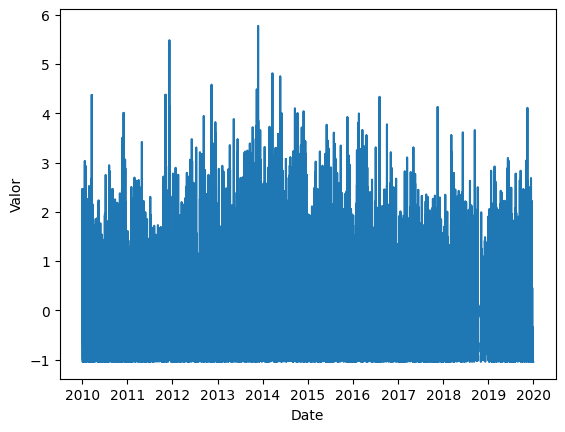

In [56]:
#plot valor by date to check if windowed dataset is correct
import matplotlib.pyplot as plt
plt.plot(train_df['data'], train_df['valor'])
plt.xlabel('Date')
plt.ylabel('Valor')
plt.show()





In [ ]:
#create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])



2023-04-16 14:03:13.901238: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:06:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-16 14:03:13.901475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-16 14:03:13.901530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-04-16 14:03:13.901571: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-04-16 14:03:13.901610: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [ ]:
#train model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

NameError: name 'train_ds' is not defined

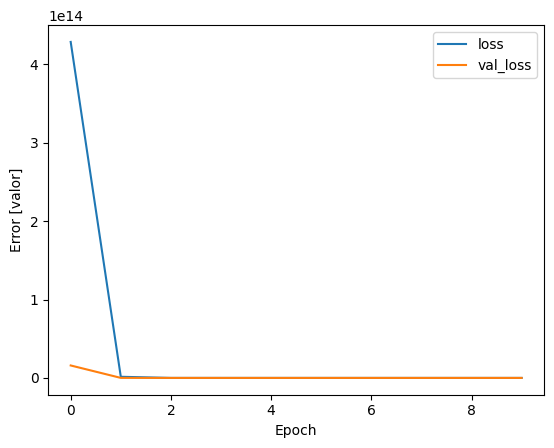

In [ ]:
#plot loss and mean absolute error
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [valor]')
plt.legend(loc='upper right')
plt.show()


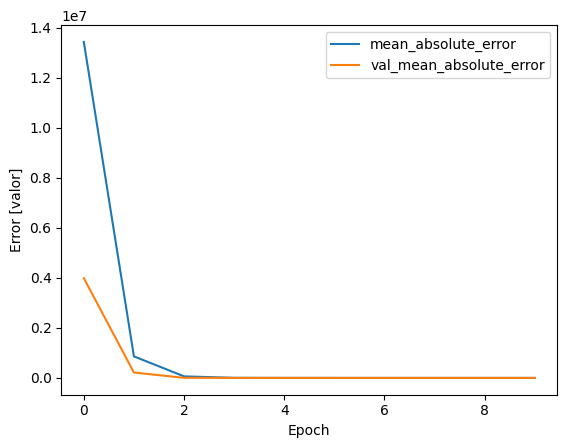

In [ ]:
#plot mean absolute error
plt.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label = 'val_mean_absolute_error')
plt.xlabel('Epoch')
plt.ylabel('Error [valor]')
plt.legend(loc='upper right')
plt.show()


In [ ]:
#check if model is analyzing the right time series
print('Input shape:', train_inputs.shape)
print('Output shape:', model.predict(train_inputs).shape)


Input shape: (32, 7, 15)
1/1 [==============================] - 0s 73ms/step
Output shape: (32, 7, 1)
